# 如何使用Keras函數式API進行深度學習
https://zhuanlan.zhihu.com/p/53933876

In [1]:
import platform
import tensorflow
import keras
print("Platform:{}".format(platform.platform()))
print("Tensorflow version:{}".format(tensorflow.__version__))
print("Keras version:{}".format(keras.__version__))

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import Image

Using TensorFlow backend.


Platform:Darwin-18.2.0-x86_64-i386-64bit
Tensorflow version:1.13.0-dev20190126
Keras version:2.2.4


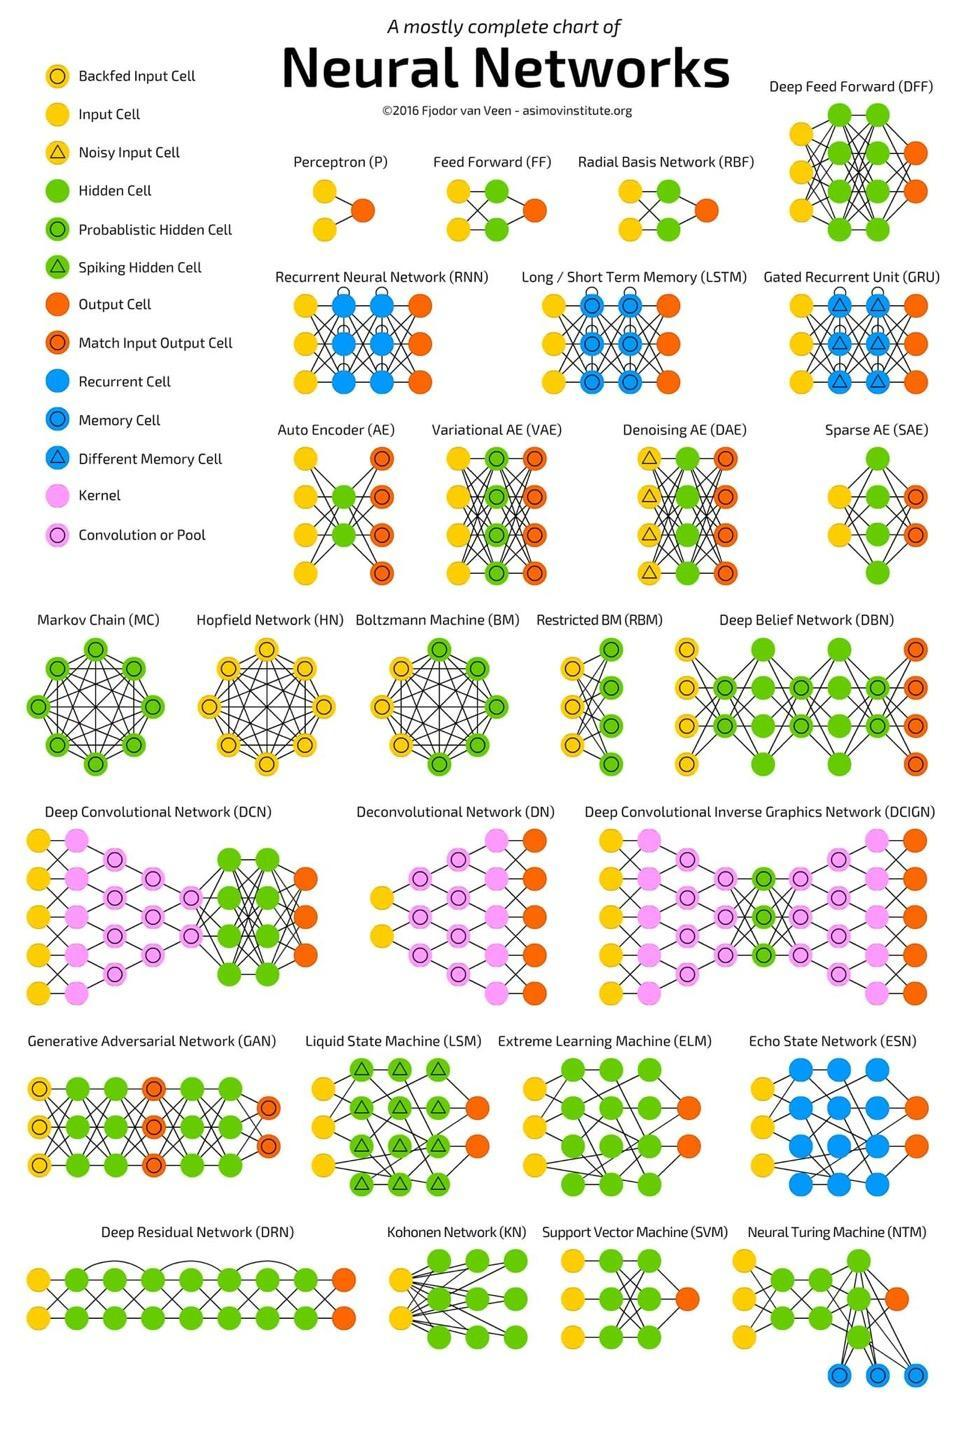

In [2]:
from IPython.display import Image
Image('neural_networks.jpg')

## 序貫模型(Sequential Models)

In [3]:
from keras.models import Sequential
from keras.layers import Dense

# 构建模型
model = Sequential([Dense(2,input_shape=(1,)),Dense(1)])

In [4]:
from keras.models import Sequential
from keras.layers import Dense

# 构建模型
model = Sequential()
model.add(Dense(2,input_shape=(1,)))
model.add(Dense(1))

## 函數式(functional)API構建模型

In [5]:
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model

mnist_input = Input(shape=(784,))
hidden = Dense(512)(mnist_input)
model = Model(inputs=mnist_input,outputs=hidden)

## 標準網絡模型

### 多層感知器(Multilayer Perceptron)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 512)               401920    
_________________________________________________________________
hidden2 (Dense)              (None, 216)               110808    
_________________________________________________________________
hidden3 (Dense)              (None, 128)               27776     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 541,794
Trainable params: 541,794
Non-trainable params: 0
_________________________________________________________________


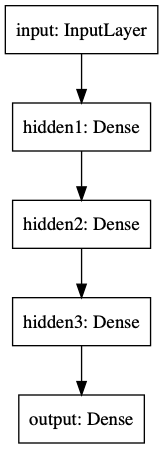

In [6]:
from keras.models import Model
from keras.layers import Input,Dense
from keras.utils import plot_model

import matplotlib.pyplot as plt
from IPython.display import Image

mnist_input = Input(shape=(784,),name='input')
hidden1 = Dense(512,activation='relu',name='hidden1')(mnist_input)
hidden2 = Dense(216,activation='relu',name='hidden2')(hidden1)
hidden3 = Dense(128,activation='relu',name='hidden3')(hidden2)
output = Dense(10,activation='softmax',name='output')(hidden3)

model = Model(inputs=mnist_input,outputs=output)

# 打印網絡結構
model.summary()

# 產生網絡拓補圖
plot_model(model,to_file='multilayer_perceptron_graph.png')

# 秀出網絡拓補圖
Image('multilayer_perceptron_graph.png')

### 卷積神經網絡(CNN)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 28, 28, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 25, 25, 128)       2176      
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 12, 12, 128)       0         
_________________________________________________________________
conv2 (Conv2D)               (None, 9, 9, 64)          131136    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 4, 4, 64)          0         
_________________________________________________________________
hidden1 (Dense)              (None, 4, 4, 64)          4160      
_________________________________________________________________
output (Dense)               (None, 4, 4, 10)          650       
Total para

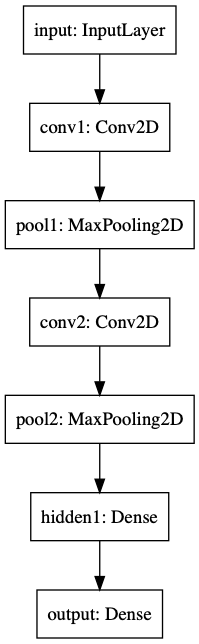

In [7]:
from keras.models import Model
from keras.layers import Input,Dense
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.utils import plot_model
from IPython.display import Image

mnist_input = Input(shape=(28,28,1), name='input')

conv1 = Conv2D(128,kernel_size=4,activation='relu',name='conv1')(mnist_input)
pool1 = MaxPool2D(pool_size=(2,2),name='pool1')(conv1)

conv2 = Conv2D(64,kernel_size=4,activation='relu',name='conv2')(pool1)
pool2 = MaxPool2D(pool_size=(2,2),name='pool2')(conv2)

hidden1 = Dense(64,activation='relu',name='hidden1')(pool2)
output = Dense(10,activation='softmax',name='output')(hidden1)
model = Model(inputs=mnist_input,outputs=output)

# 打印網絡結構
model.summary()

# 產生網絡拓補圖
plot_model(model,to_file='convolutional_neural_network.png')

# 秀出網絡拓補圖
Image('convolutional_neural_network.png')

### 遞歸神經網絡(RNN)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 784, 1)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
hidden1 (Dense)              (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 84,362
Trainable params: 84,362
Non-trainable params: 0
_________________________________________________________________


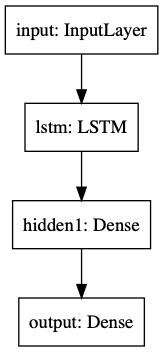

In [8]:
from keras.models import Model
from keras.layers import Input,Dense
from keras.layers.recurrent import LSTM
from keras.utils import plot_model

mnist_input = Input(shape=(784,1),name='input') # 把每一個像素想成是一序列有前後關係的time_steps
lstm1 = LSTM(128,name='lstm')(mnist_input)
hidden1 = Dense(128,activation='relu',name='hidden1')(lstm1)
output = Dense(10,activation='softmax',name='output')(hidden1)
model = Model(inputs=mnist_input,outputs=output)

# 打印網絡結構
model.summary()

# 產生網絡拓補圖
plot_model(model,to_file='recurrent_neural_network.png')

# 秀出網絡拓補圖
Image('recurrent_neural_network.png')

## 共享層模型

### 共享輸入層(Shared Input Layer)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 25, 25, 32)   544         input[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 21, 21, 16)   1040        input[0][0]                      
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 12, 12, 32)   0           conv1[0][0]                      
__________________________________________________________________________________________________
pool2 (Max

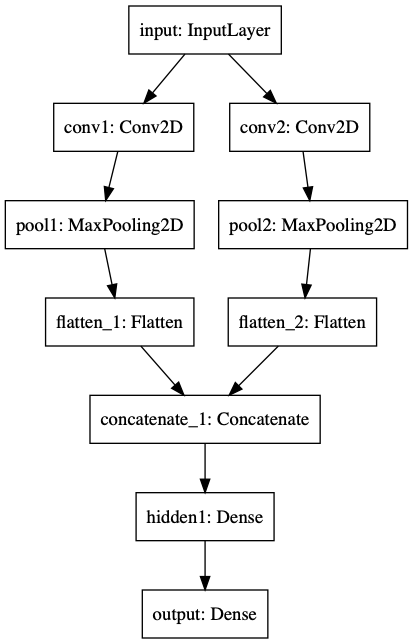

In [9]:
from keras.models import Model
from keras.layers import Input,Dense,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.merge import concatenate
from keras.utils import plot_model

from IPython.display import Image

# 輸入層
mnist_input = Input(shape=(28,28,1),name='input')

# 第一個特徵提取層
conv1 = Conv2D(32,kernel_size=4,activation='relu',name='conv1')(mnist_input) # <- 看這裡
pool1 = MaxPool2D(pool_size=(2,2),name='pool1')(conv1)
flat1 = Flatten()(pool1)

# 第二個特徵提取層
conv2 = Conv2D(16,kernel_size=8,activation='relu',name='conv2')(mnist_input) # <- 看這裡
pool2 = MaxPool2D(pool_size=(2,2),name='pool2')(conv2)
flat2 = Flatten()(pool2)

# 把這兩個特徵提取層的結果拼接起來
merge = concatenate([flat1,flat2])

# 進行全連接層
hidden1 = Dense(64,activation='relu',name='hidden1')(merge)

# 輸出層
output = Dense(10,activation='softmax',name='output')(hidden1)

# 以model來組合整個網絡
model = Model(inputs=mnist_input,outputs=output)

# 打印網絡結構
model.summary()

# 網絡結構可視化
plot_model(model,to_file='shared_input_layer.png')

# 秀出網絡拓補圖
Image('shared_input_layer.png')

### 共享特徵提取層(Shared Feature Extraction Layer)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 784, 1)       0                                            
__________________________________________________________________________________________________
lstm1 (LSTM)                    (None, 128)          66560       input[0][0]                      
__________________________________________________________________________________________________
interp21 (Dense)                (None, 64)           8256        lstm1[0][0]                      
__________________________________________________________________________________________________
interp22 (Dense)                (None, 32)           2080        interp21[0][0]                   
__________________________________________________________________________________________________
interp1 (D

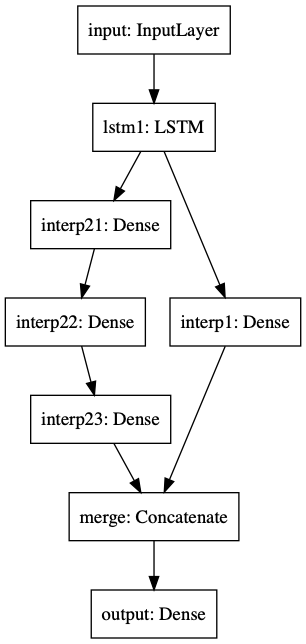

In [10]:
from keras.models import Model
from keras.layers import Input,Dense
from keras.layers.recurrent import LSTM
from keras.layers.merge import concatenate
from keras.utils import plot_model

from IPython.display import Image

# 輸入層
mnist_input = Input(shape=(784,1),name='input') # 把每一個像素想成是一序列有前後關係的time_steps

# 特徵提取層
extract1 = LSTM(128,name='lstm1')(mnist_input)

# 第一個解釋層(淺層單連通層)
interp1 = Dense(10,activation='relu',name='interp1')(extract1) # <- 看這裡

# 第二個解釋層(深層3層模型)
interp21 = Dense(64,activation='relu',name='interp21')(extract1) # <- 看這裡
interp22 = Dense(32,activation='relu',name='interp22')(interp21)
interp23 = Dense(10,activation='relu',name='interp23')(interp22)

# 把兩個特徵提取層的結果拼起來
merge = concatenate([interp1,interp23],name='merge')

# 輸出層
output = Dense(10,activation='softmax',name='output')(merge)

# 以Ｍodel來組合整個網絡
model = Model(inputs=mnist_input,outputs=output)

# 打印網絡結構
model.summary()

# 可視化
plot_model(model,to_file='shared_feature_extractor.png')

# 秀出網絡拓補圖
Image('shared_feature_extractor.png')

## 多種輸入和輸出模型

### 多輸入模型

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_gray_bigsize (InputLayer)   (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
img_rgb_bigsize (InputLayer)    (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv11 (Conv2D)                 (None, 61, 61, 32)   544         img_gray_bigsize[0][0]           
__________________________________________________________________________________________________
conv21 (Conv2D)                 (None, 29, 29, 32)   1568        img_rgb_bigsize[0][0]            
__________________________________________________________________________________________________
pool11 (Ma

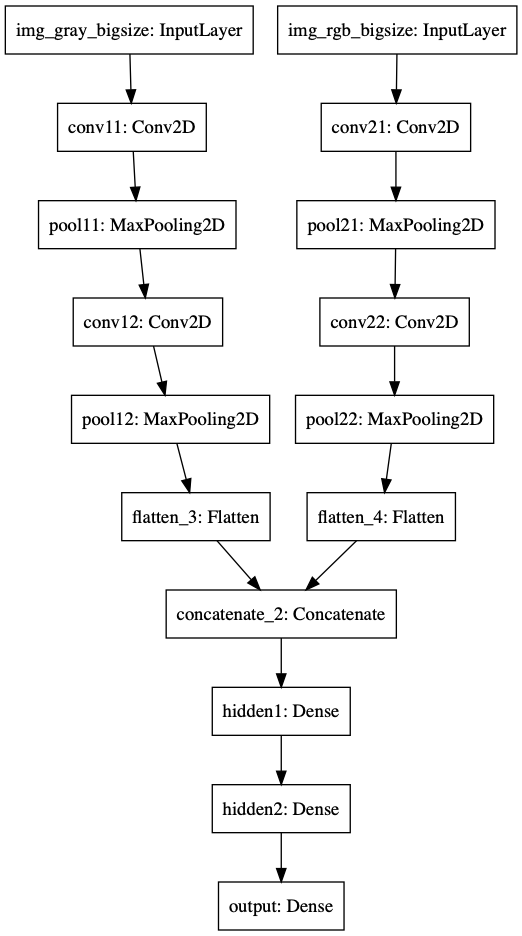

In [11]:
from keras.models import Model
from keras.layers import Input,Dense,Flatten
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers.merge import concatenate
from keras.utils import plot_model

from IPython.display import Image

import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'  # 安裝graphviz的路徑

# 第一個輸入層
img_gray_bigsize = Input(shape=(64,64,1),name='img_gray_bigsize')
conv11 = Conv2D(32,kernel_size=4,activation='relu',name='conv11')(img_gray_bigsize)
pool11 = MaxPool2D(pool_size=(2,2),name='pool11')(conv11)
conv12 = Conv2D(16,kernel_size=4,activation='relu',name='conv12')(pool11)
pool12 = MaxPool2D(pool_size=(2,2),name='pool12')(conv12)
flat1 = Flatten()(pool12)

# 第二個輸入層
img_rgb_smallsize = Input(shape=(32,32,3),name='img_rgb_bigsize')
conv21 = Conv2D(32,kernel_size=4,activation='relu',name='conv21')(img_rgb_smallsize)
pool21 = MaxPool2D(pool_size=(2,2),name='pool21')(conv21)
conv22 = Conv2D(16,kernel_size=4,activation='relu',name='conv22')(pool21)
pool22 = MaxPool2D(pool_size=(2,2),name='pool22')(conv22)
flat2 = Flatten()(pool22)

# 把兩個特徵提取層的結果拼起來
merge = concatenate([flat1,flat2])

# 用隱藏的全連接層來解釋特徵
hidden1 = Dense(128,activation='relu',name='hidden1')(merge)
hidden2 = Dense(64,activation='relu',name='hidden2')(hidden1)

# 輸出層
output = Dense(10,activation='softmax',name='output')(hidden2)
# 以Model來組合整個網絡
model = Model(inputs=[img_gray_bigsize,img_rgb_smallsize],outputs=output)

# 打印網絡結構
model.summary()
# 可視化
plot_model(model,to_file='multiple_inputs.png')

# 秀出網絡拓補圖
Image('multiple_inputs.png')

### 多輸出模型

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 784, 1)       0                                            
__________________________________________________________________________________________________
extract (LSTM)                  (None, 784, 64)      16896       input[0][0]                      
__________________________________________________________________________________________________
class11 (LSTM)                  (None, 32)           12416       extract[0][0]                    
__________________________________________________________________________________________________
class12 (Dense)                 (None, 32)           1056        class11[0][0]                    
__________________________________________________________________________________________________
output1 (D

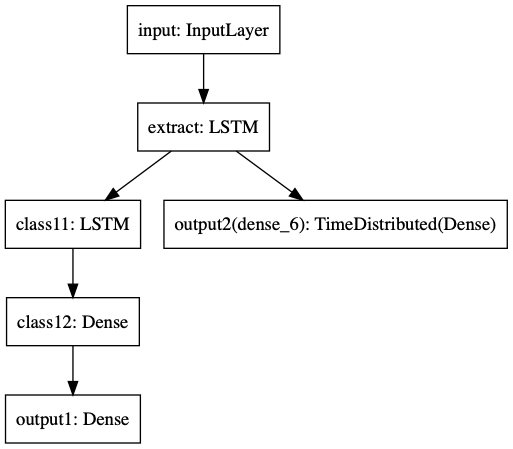

In [12]:
from keras.models import Model
from keras.layers import Input,Dense
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import TimeDistributed
from keras.utils import plot_model

from IPython.display import Image

# 輸入層
mnist_input = Input(shape=(784,1),name='input') # 吧每一個像素想成是一序列有前後關係的time_steps

# 特徵提取層
extract = LSTM(64,return_sequences=True,name='extract')(mnist_input)

# 分類輸出
class11 = LSTM(32,name='class11')(extract)
class12 = Dense(32,activation='relu',name='class12')(class11)
output1 = Dense(10,activation='softmax',name='output1')(class12)

# 序列輸出
output2 = TimeDistributed(Dense(10,activation='softmax'),name='output2')(extract)

# 以Model來組合整個網絡
model = Model(inputs=mnist_input,outputs=[output1,output2])

# 打印網絡結構
model.summary()

# plot_model可視化
plot_model(model,to_file='multiple_outputs.png')
# 秀出拓補圖
Image('multiple_outputs.png')